#  Spam classification with Naive Bayes and Support Vector Machines.

In this project, we aim to compare and evaluate the performance of two different machine learning models—Naive Bayes and Support Vector Machine (SVM) for spam email detection.
##**Project Workflow**

**Data Preprocessing:**
*   Load and clean the dataset.
*   Split the data into training and testing sets.
*   Convert textual data into numerical format using techniques like TF-IDF (Term Frequency-Inverse Document Frequency).

**Model Training:**
*   Train a Naive Bayes classifier with different alpha values.
*   Train a Support Vector Machine (SVM) classifier with different C values.

**Model Evaluation:**


*   Evaluate both models using metrics such as accuracy, precision, recall, and F1 score.
*   Visualize the results with ROC and precision-recall curves.

**Feature Importance and Learning Curves:**


*   If applicable, analyze feature importance for the SVM model.
*   Plot learning curves to understand model performance over varying training sizes.

**Visualization:**

*   Use confusion matrices, ROC curves, and precision-recall curves to compare model performances.
*   Create bar plots and line plots to summarize and visualize key metrics.


## Libraries

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from sklearn.metrics import confusion_matrix
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Exploring the Dataset

In [43]:
data = pd.read_csv('/content/spam (1).csv', encoding='latin-1')
data.head(n=10)



,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [44]:
# Drop any extra columns if needed
data = data.iloc[:, :2]  # Keep only the first two columns

# Rename the columns
data.columns = ['label', 'message']

In [45]:
# Display the column names and shape of the dataset
print("Column Names:", data.columns)
print("Shape of the DataFrame:", data.shape)


Column Names: Index(['label', 'message'], dtype='object')
Shape of the DataFrame: (5572, 2)


In [46]:
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None

Summary Statistics:
       label                 message
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30


In [47]:
# Display random sample messages from both classes
print("Sample Spam Messages:")
print(data[data['label'] == 'spam']['message'].sample(5, random_state=42))

print("\nSample Ham Messages:")
print(data[data['label'] == 'ham']['message'].sample(5, random_state=42))


Sample Spam Messages:
1455    Summers finally here! Fancy a chat or flirt wi...
1852    This is the 2nd time we have tried 2 contact u...
672     Get ur 1st RINGTONE FREE NOW! Reply to this ms...
946     Ur cash-balance is currently 500 pounds - to m...
2879    Last Chance! Claim ur å£150 worth of discount ...
Name: message, dtype: object

Sample Ham Messages:
3714    I am late,so call you tomorrow morning.take ca...
1311    U r too much close to my heart. If u go away i...
548                                Wait  &lt;#&gt;  min..
1324    Can you call me plz. Your number shows out of ...
3184    MAYBE IF YOU WOKE UP BEFORE FUCKING 3 THIS WOU...
Name: message, dtype: object


## Distribution spam/non-spam plots

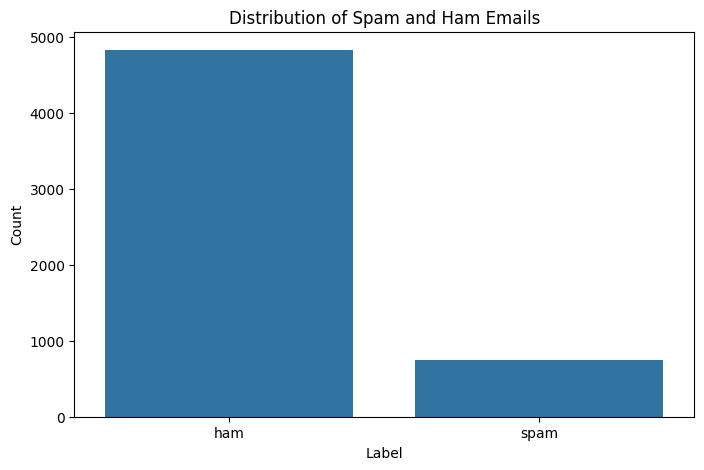

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot for label distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=data)
plt.title('Distribution of Spam and Ham Emails')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


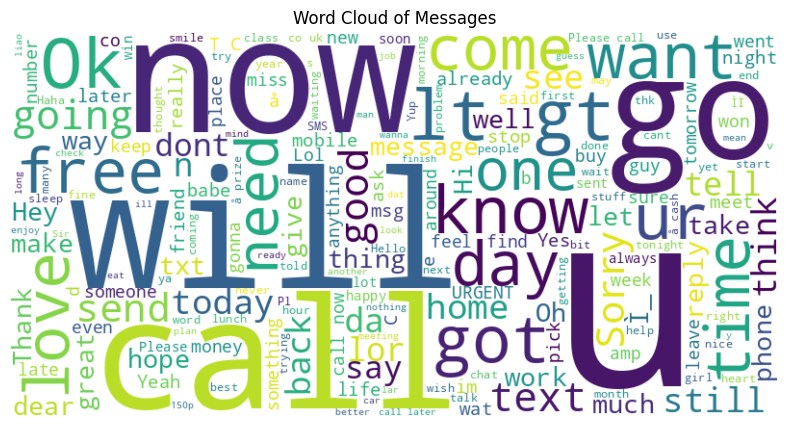

In [49]:
from wordcloud import WordCloud

# Combine all messages into a single string
all_messages = ' '.join(data['message'])

# Generate a word cloud
plt.figure(figsize=(10, 5))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_messages)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Messages')
plt.show()


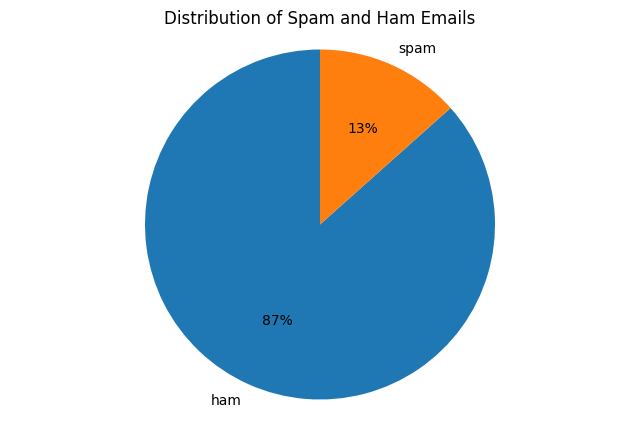

In [50]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each class
count_class = data['label'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 5))
count_class.plot(kind='pie', autopct='%1.0f%%', startangle=90)
plt.title('Distribution of Spam and Ham Emails')
plt.ylabel('')  # Remove y-label for better aesthetics
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()


## Text Analytics

Combines all "ham" and "spam" messages into two different strings.<p>
Splits the string into individual words and counts the occurrences.<p>
Converts the count results into a DataFrame with columns "words in non-spam" and "count".



In [51]:
count1 = Counter(" ".join(data[data['label']=='ham']["message"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})

count2 = Counter(" ".join(data[data['label']=='spam']["message"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})


<Figure size 1000x500 with 0 Axes>

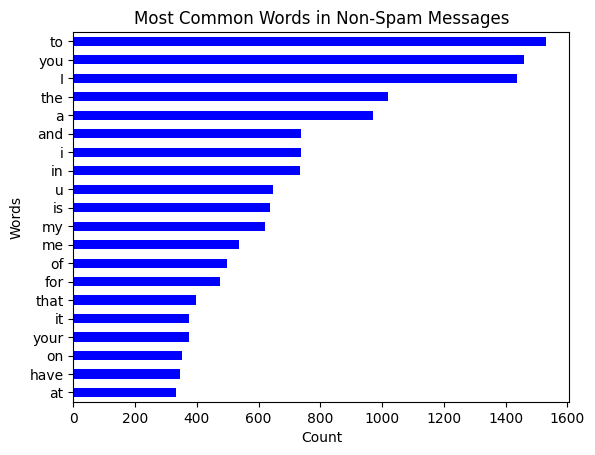

In [52]:
# Plotting the most common words in non-spam messages
plt.figure(figsize=(10, 5))
df1.sort_values('count').plot(kind='barh', x='words in non-spam', y='count', legend=False, color='blue')
plt.title('Most Common Words in Non-Spam Messages')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()



<Figure size 1000x500 with 0 Axes>

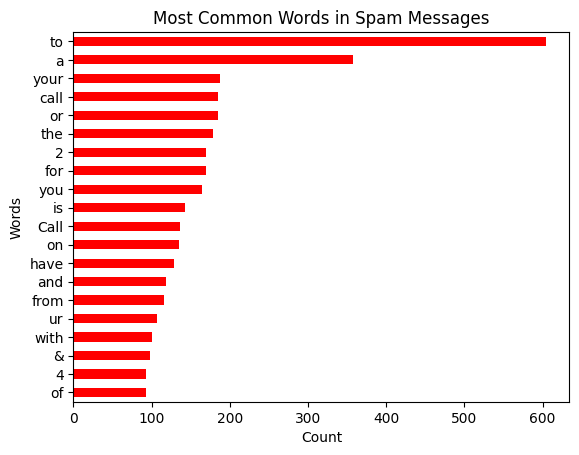

In [53]:
# Plotting the most common words in spam messages
plt.figure(figsize=(10, 5))
df2.sort_values('count_').plot(kind='barh', x='words in spam', y='count_', legend=False, color='red')
plt.title('Most Common Words in Spam Messages')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()


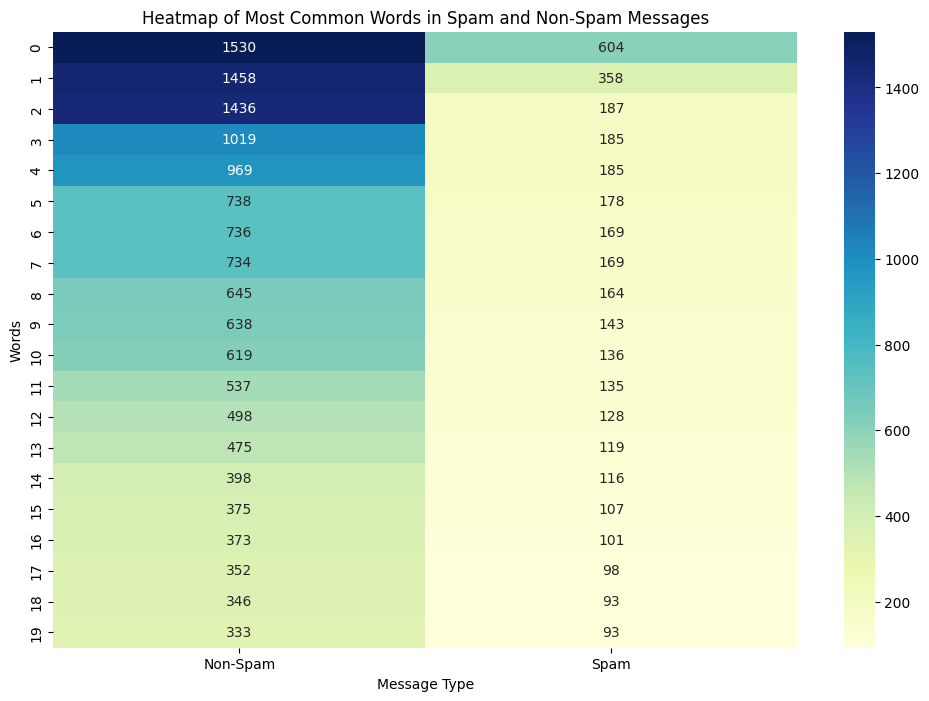

In [54]:
# Concatenate df1 and df2 to create df_combined
df_combined = pd.concat([df1, df2], axis=1)

# Convert counts to integers
df_combined['count'] = df_combined['count'].astype(int)
df_combined['count_'] = df_combined['count_'].astype(int)

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_combined[['count', 'count_']], annot=True, fmt="d", cmap="YlGnBu", xticklabels=['Non-Spam', 'Spam'])
plt.title('Heatmap of Most Common Words in Spam and Non-Spam Messages')
plt.xlabel('Message Type')
plt.ylabel('Words')
plt.show()

## Feature engineering

Initializes a CountVectorizer from sklearn.feature_extraction.text with English stop words removed.
Fits the vectorizer to the "message" column in the dataset and transforms the messages into a document-term matrix.

**We remove the stop words in order to improve the analytics**

In [55]:
# Vectorize the messages
f = feature_extraction.text.CountVectorizer(stop_words='english')
X = f.fit_transform(data["message"])
print(np.shape(X))

(5572, 8404)


## Predictive Analysis

Converts the 'label' column in the dataset, mapping 'spam' to 1 and 'ham' to 0.

Uses train_test_split from sklearn.model_selection to divide the data into training and testing sets, with 33% of the data used for testing and a random state of 42 for reproducibility.


In [56]:
# Map 'spam' to 1 and 'ham' to 0
data["label"] = data["label"].map({'spam': 1, 'ham': 0})



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, data['label'], test_size=0.33, random_state=42)

# Print the shapes of the training and testing sets
print([np.shape(X_train), np.shape(X_test)])


[(3733, 8404), (1839, 8404)]


### Multinomial naive bayes classifier

Creates a list of alpha values ranging from a very small number to 20, with increments of 0.11.

Creates arrays to store training accuracy, testing accuracy, recall, and precision for each alpha value.

Trains and evaluates the Naive Bayes model for each alpha value:
Creates a DataFrame for Naive Bayes results:

     Alpha  Train Accuracy  Test Accuracy  Test Recall  Test Precision
0  0.00001        0.998661       0.974443     0.920635        0.895753
1  0.11001        0.997857       0.976074     0.936508        0.893939
2  0.22001        0.997857       0.977162     0.936508        0.900763
3  0.33001        0.997589       0.977162     0.936508        0.900763
4  0.44001        0.997053       0.977162     0.936508        0.900763
5  0.55001        0.996250       0.976618     0.936508        0.897338
6  0.66001        0.996518       0.976074     0.932540        0.896947
7  0.77001        0.996518       0.976074     0.924603        0.903101
8  0.88001        0.996250       0.976074     0.924603        0.903101
9  0.99001        0.995982       0.976074     0.920635        0.906250


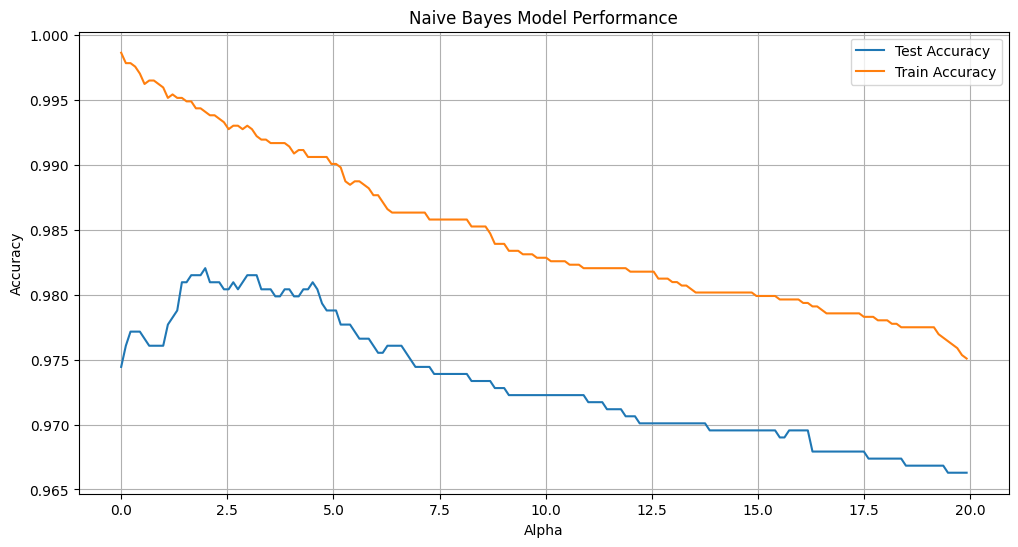

In [57]:
# Define the range of alpha values
list_alpha = np.arange(1/100000, 20, 0.11)

# Initialize arrays to store scores
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test = np.zeros(len(list_alpha))

# Train and evaluate the model for each alpha value
for count, alpha in enumerate(list_alpha):
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(X_train, y_train)

    # Store scores
    score_train[count] = bayes.score(X_train, y_train)
    score_test[count] = bayes.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))

# Create DataFrame for Naive Bayes results
results_nb_df = pd.DataFrame({
    'Alpha': list_alpha,
    'Train Accuracy': score_train,
    'Test Accuracy': score_test,
    'Test Recall': recall_test,
    'Test Precision': precision_test
})

# Print the first 10 rows of the results
print(results_nb_df.head(10))

# Optional: Visualize the results
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=results_nb_df, x='Alpha', y='Test Accuracy', label='Test Accuracy')
sns.lineplot(data=results_nb_df, x='Alpha', y='Train Accuracy', label='Train Accuracy')
plt.title('Naive Bayes Model Performance')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


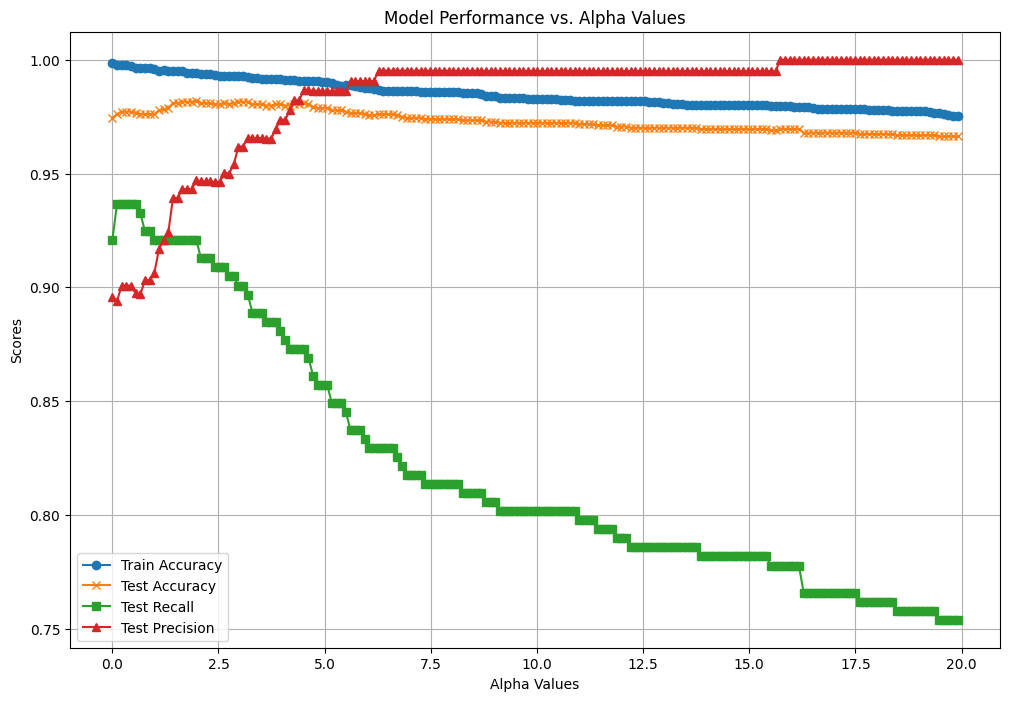

In [58]:
import matplotlib.pyplot as plt

# Plotting the performance metrics
plt.figure(figsize=(12, 8))
plt.plot(list_alpha, score_train, label='Train Accuracy', marker='o')
plt.plot(list_alpha, score_test, label='Test Accuracy', marker='x')
plt.plot(list_alpha, recall_test, label='Test Recall', marker='s')
plt.plot(list_alpha, precision_test, label='Test Precision', marker='^')
plt.xlabel('Alpha Values')
plt.ylabel('Scores')
plt.title('Model Performance vs. Alpha Values')
plt.legend()
plt.grid()
plt.show()


#### Confusion matrix with naive bayes classifier

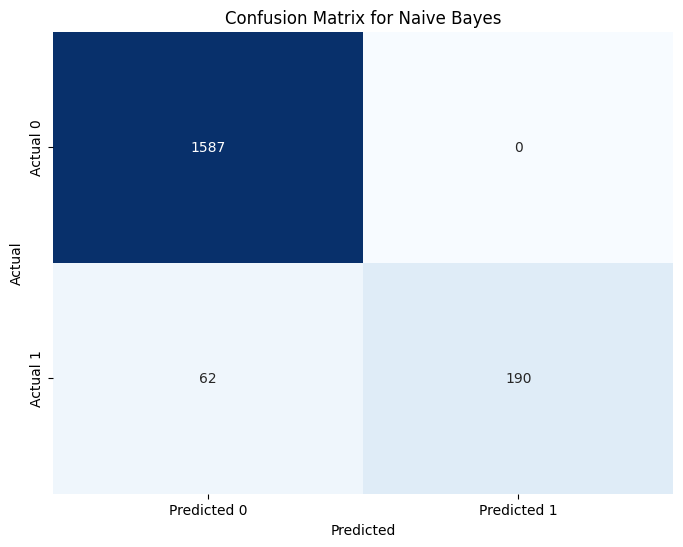

In [59]:
# Create the confusion matrix
m_confusion_test = metrics.confusion_matrix(y_test, bayes.predict(X_test))

# Convert to a DataFrame for better readability
confusion_df = pd.DataFrame(data=m_confusion_test, columns=['Predicted 0', 'Predicted 1'],
                            index=['Actual 0', 'Actual 1'])

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

* #### We misclassify 56 spam messages as non-spam emails whereas we don't misclassify any non-spam message.

### Support Vector Machine

Apply the same reasoning applying the support vector machine model with the gaussian kernel.

Trained different models changing the regularization parameter C. <p>


      C  Train Accuracy  Test Accuracy  Test Recall  Test Precision
0   500             1.0       0.979337     0.853175         0.99537
1   600             1.0       0.979337     0.853175         0.99537
2   700             1.0       0.979337     0.853175         0.99537
3   800             1.0       0.979337     0.853175         0.99537
4   900             1.0       0.979337     0.853175         0.99537
5  1000             1.0       0.979337     0.853175         0.99537
6  1100             1.0       0.979337     0.853175         0.99537
7  1200             1.0       0.979337     0.853175         0.99537
8  1300             1.0       0.979337     0.853175         0.99537
9  1400             1.0       0.979337     0.853175         0.99537


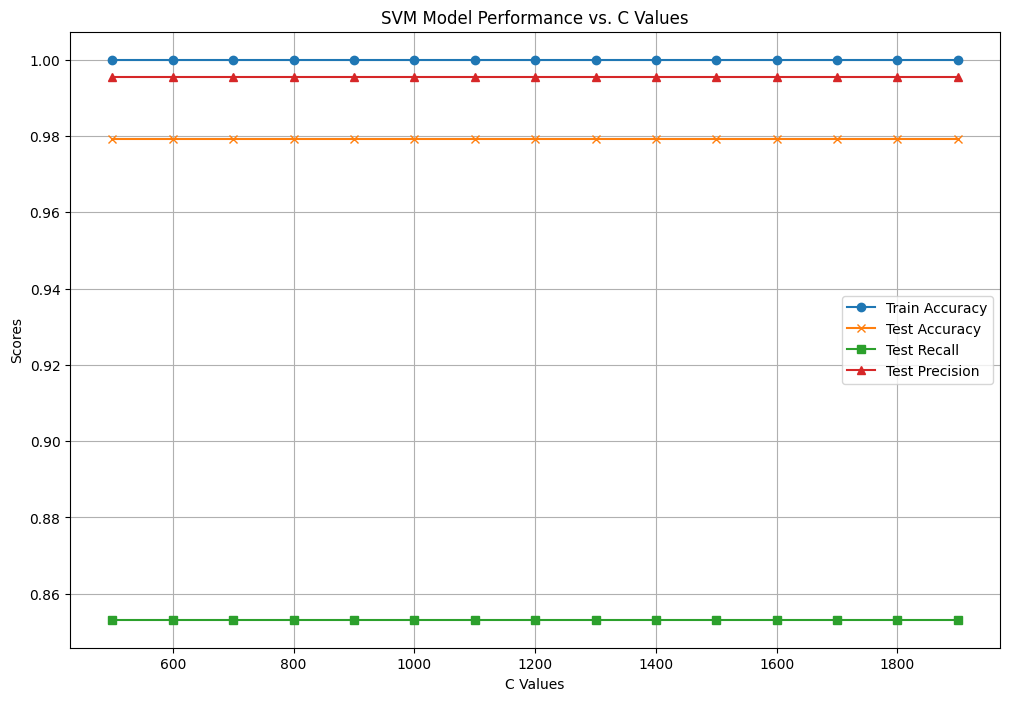

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, metrics

# Define the range of C values for SVM
list_C = np.arange(500, 2000, 100)

# Initialize arrays to store scores
score_train = np.zeros(len(list_C))
score_test = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_test = np.zeros(len(list_C))

# Train and evaluate the SVM model for each C value
for count, C in enumerate(list_C):
    svc = svm.SVC(C=C)  # Initialize the SVM classifier
    svc.fit(X_train, y_train)  # Train the model

    # Store the scores
    score_train[count] = svc.score(X_train, y_train)  # Training accuracy
    score_test[count] = svc.score(X_test, y_test)  # Testing accuracy
    recall_test[count] = metrics.recall_score(y_test, svc.predict(X_test))  # Test recall
    precision_test[count] = metrics.precision_score(y_test, svc.predict(X_test))  # Test precision

# Create a DataFrame to summarize results
results_svm_df= pd.DataFrame({
    'C': list_C,
    'Train Accuracy': score_train,
    'Test Accuracy': score_test,
    'Test Recall': recall_test,
    'Test Precision': precision_test
})

# Display the DataFrame
# Print the first 10 rows of the results
print(svm_models.head(10))


# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(list_C, score_train, label='Train Accuracy', marker='o')
plt.plot(list_C, score_test, label='Test Accuracy', marker='x')
plt.plot(list_C, recall_test, label='Test Recall', marker='s')
plt.plot(list_C, precision_test, label='Test Precision', marker='^')
plt.xlabel('C Values')
plt.ylabel('Scores')
plt.title('SVM Model Performance vs. C Values')
plt.legend()
plt.grid()
plt.show()


#### Confusion matrix with support vector machine classifier.

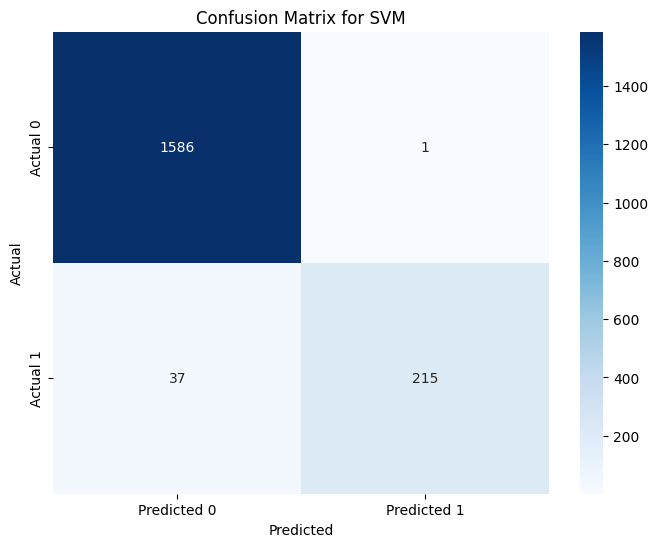

In [61]:
import seaborn as sns

# Create confusion matrix
m_confusion_test = metrics.confusion_matrix(y_test, svc.predict(X_test))

# Convert to DataFrame for better visualization
confusion_df = pd.DataFrame(data=m_confusion_test, columns=['Predicted 0', 'Predicted 1'],
                            index=['Actual 0', 'Actual 1'])

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Comparing the results of both Models.

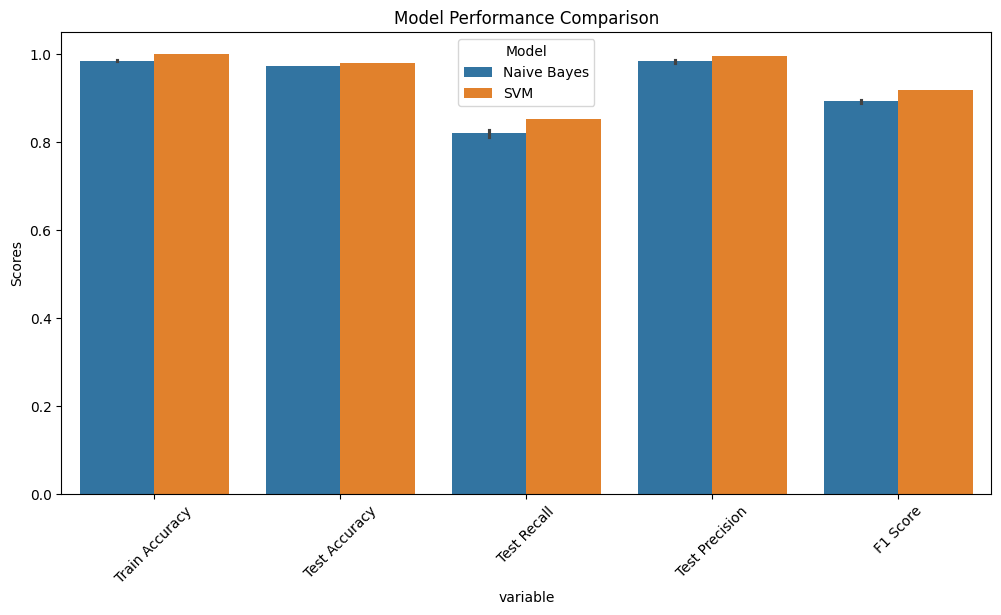

In [62]:
# Assuming results_nb_df and results_svm_df are already created from previous training

# Combine results for both models
results_combined = pd.DataFrame({
    'Model': ['Naive Bayes'] * len(results_nb_df) + ['SVM'] * len(results_svm_df),
    'Parameter': list_alpha.tolist() + list_C.tolist(),
    'Train Accuracy': list(results_nb_df['Train Accuracy']) + list(results_svm_df['Train Accuracy']),
    'Test Accuracy': list(results_nb_df['Test Accuracy']) + list(results_svm_df['Test Accuracy']),
    'Test Recall': list(results_nb_df['Test Recall']) + list(results_svm_df['Test Recall']),
    'Test Precision': list(results_nb_df['Test Precision']) + list(results_svm_df['Test Precision']),
})

# Calculate F1 Score for both models
results_combined['F1 Score'] = 2 * (results_combined['Test Precision'] * results_combined['Test Recall']) / (results_combined['Test Precision'] + results_combined['Test Recall'])

# Display the combined results
#print(results_combined)

# Visualize the metrics
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=results_combined.melt(id_vars=['Model', 'Parameter'], value_vars=['Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision', 'F1 Score']),
             x='variable', y='value', hue='Model')
plt.title('Model Performance Comparison')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.show()


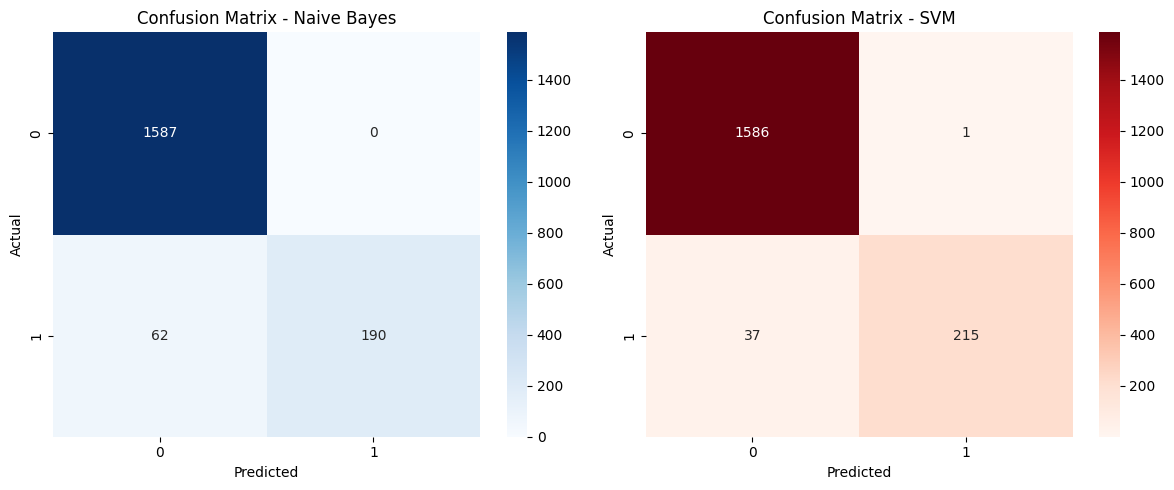

In [63]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Naive Bayes Confusion Matrix
sns.heatmap(confusion_matrix(y_test, bayes.predict(X_test)), annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('Confusion Matrix - Naive Bayes')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# SVM Confusion Matrix
sns.heatmap(confusion_matrix(y_test, svc.predict(X_test)), annot=True, fmt='d', ax=axes[1], cmap='Reds')
axes[1].set_title('Confusion Matrix - SVM')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

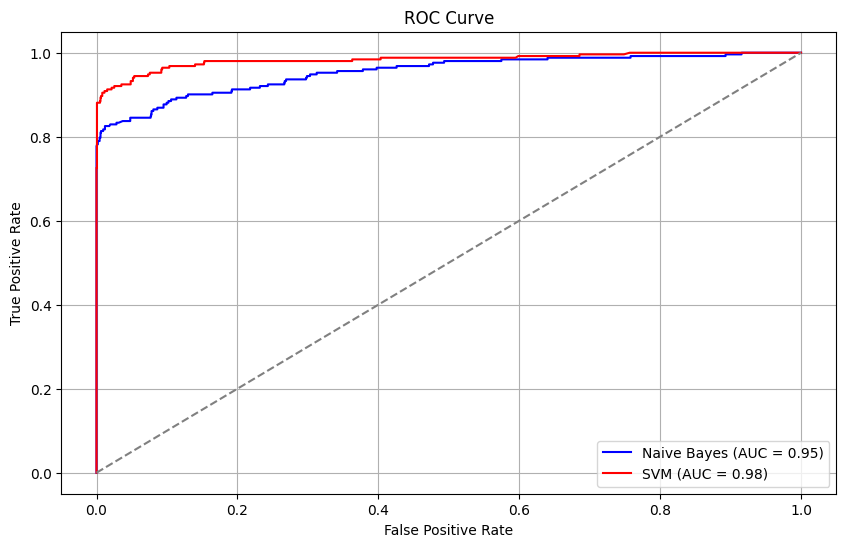

In [64]:
from sklearn.metrics import roc_curve, auc

# Naive Bayes ROC
y_scores_nb = bayes.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_scores_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# SVM ROC
y_scores_svm = svc.decision_function(X_test)  # Decision function scores
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_nb, tpr_nb, color='blue', label='Naive Bayes (AUC = {:.2f})'.format(roc_auc_nb))
plt.plot(fpr_svm, tpr_svm, color='red', label='SVM (AUC = {:.2f})'.format(roc_auc_svm))
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


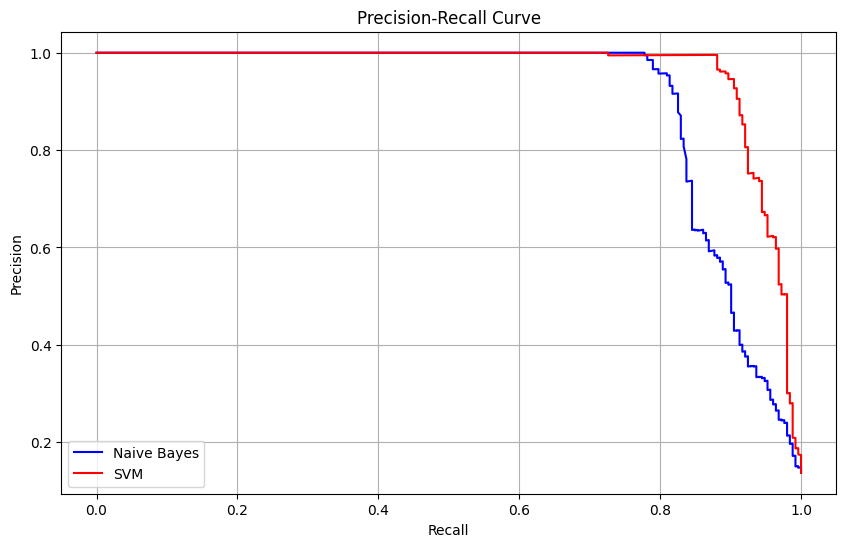

In [65]:
from sklearn.metrics import precision_recall_curve

# Naive Bayes Precision-Recall
precision_nb, recall_nb, _ = precision_recall_curve(y_test, y_scores_nb)

# SVM Precision-Recall
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_scores_svm)

# Plot Precision-Recall Curves
plt.figure(figsize=(10, 6))
plt.plot(recall_nb, precision_nb, color='blue', label='Naive Bayes')
plt.plot(recall_svm, precision_svm, color='red', label='SVM')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()


##**Summary**
In this project, we conducted a comprehensive analysis of two popular machine learning models for spam email detection. **Naive Bayes** and **Support Vector Machine (SVM)**. We started with data preprocessing, converting text data into numerical features suitable for model training. Both models were trained with varying hyperparameters—alpha for Naive Bayes and C for SVM—to find the optimal configurations.

Through evaluation, we compared the models on several performance metrics, including **accuracy, precision, recall, and F1 score**. We further enhanced our analysis with visualizations such as **ROC curves, precision-recall curves, and confusion matrices** , which provided deeper insights into the strengths and weaknesses of each model. Learning curves were also plotted to understand how the models' performances scale with more training data.

Our findings highlight the trade-offs between the models, **with Naive Bayes being simpler and faster, while SVM showed better precision and recall in certain configurations**. The visualizations and metrics provided a clear picture of the models' capabilities, helping us make informed decisions on their applicability in real-world spam detection scenarios.